In [20]:
import chess  #install
import chess.svg
import chess.polyglot
import time
import traceback  #install
import chess.pgn
import chess.engine
from flask import Flask, Response, request #install
import webbrowser
import pyttsx3  #install

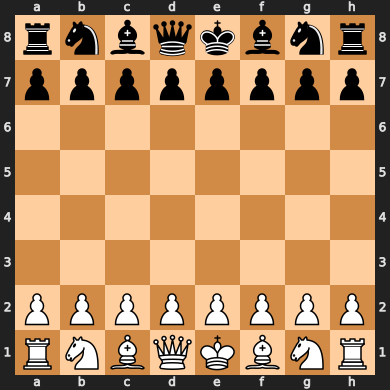

In [21]:
board = chess.Board()
board

In [22]:
#initialize the piece square tables
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

In [24]:
bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]

In [25]:
rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

In [27]:
kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [28]:
def evaluate_board():
    #check for checkmate
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0
    
    #total pieces on the board
    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))

    #calculate the material score for white
    material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)
    
    #calculate the individual score for white
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)])
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])
    
    #calculate the total evalutated score
    eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    if board.turn:
        return eval
    else:
        return -eval

In [29]:
def alphabeta(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -alphabeta(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

In [30]:
def quiesce(alpha, beta):
    stand_pat = evaluate_board()
    if (stand_pat >= beta):
        return beta
    if (alpha < stand_pat):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce(-beta, -alpha)
            board.pop()

            if (score >= beta):
                return beta
            if (score > alpha):
                alpha = score
    return alpha

In [31]:
def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("C:your_path/books/human.bin").weighted_choice(board).move
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth - 1)
            if boardValue > bestValue:
                bestValue = boardValue
                bestMove = move
            if (boardValue > alpha):
                alpha = boardValue
            board.pop()
        return bestMove

In [32]:
# OTHER VERSION OF SELECTMOVE (NOT COMPLETE)
# def selectmove(position, depth, alpha, beta, maximizingPlayer):
#     if depth == 0:
#         return evaluate_board()
#     if maximizingPlayer:
#         maxEval = -999999999
#         for move in board.legal_moves:
#             eval = selectmove(move,depth-1,alpha,beta,bool(False)) ##PROBLEM
#             if maxEval < eval:
#                 maxEval = eval
#                 bestMove = move
#             alpha = max(alpha, eval)
#             if beta <= alpha:
#                 break
#         return bestMove
#     else:
#         minEval = 999999999
#         for move in board.legal_moves:
#             eval = selectmove(move,depth-1,alpha,beta,bool(True)) ##PROBLEM
#             if minEval > eval:
#                 minEval = eval
#                 bestMove = move
#             beta = min(beta, eval)
#             if beta <= alpha:
#                 break
#         return bestMove

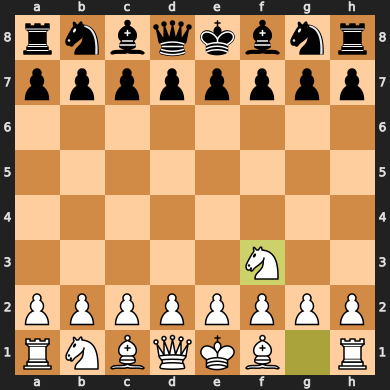

In [33]:
# use this for computer move
mov = selectmove(3)
board.push(mov)
board

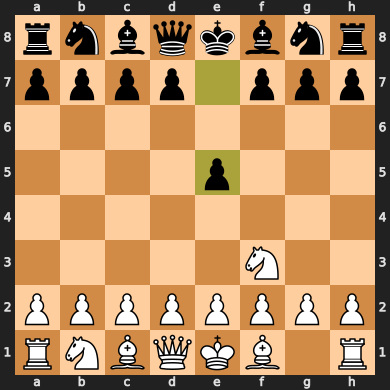

In [34]:
# use this for human move, where e5 is the example move
board.push_san("e5")
board

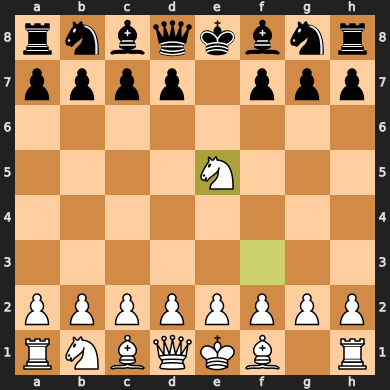

In [35]:
mov = selectmove(3)
board.push(mov)
board

In [36]:
#LET AI PLAY ITSELF
count = 0
movehistory = []
game = chess.pgn.Game()
board = chess.Board()
while not board.is_game_over(claim_draw=True):
    if board.turn:
        count += 1
        print(f'\n{count}]\n')


1]


2]


3]


4]


5]


6]


7]


8]


9]


10]


11]


12]


13]


14]


15]


16]


17]


18]


19]


20]


21]


22]


23]


24]


25]


26]


27]


28]


29]


30]


31]


32]


33]


34]


35]


36]


37]


38]


39]


40]


41]


42]


43]


44]


45]


46]


47]


48]


49]


50]


51]


52]


53]


54]


55]


56]


57]


58]


59]


60]


61]


62]


63]


64]


65]


66]


67]


68]


69]


70]


71]


72]


73]


74]


75]


76]


77]


78]


79]


80]


81]


82]


83]


84]


85]


86]


87]


88]


89]


90]


91]


92]


93]


94]


95]


96]


97]


98]


99]


100]


101]


102]


103]


104]


105]


106]


107]


108]


109]


110]


111]


112]


113]


114]


115]


116]


117]


118]


119]


120]


121]


122]


123]


124]


125]


126]


127]


128]


129]


130]


131]


132]


133]


134]


135]


136]


137]


138]


139]


140]


141]


142]


143]


144]


145]


146]


147]


148]


149]


150]


151]


152]


153]


154]


155]


156]


157]


158]


1



1190]


1191]


1192]


1193]


1194]


1195]


1196]


1197]


1198]


1199]


1200]


1201]


1202]


1203]


1204]


1205]


1206]


1207]


1208]


1209]


1210]


1211]


1212]


1213]


1214]


1215]


1216]


1217]


1218]


1219]


1220]


1221]


1222]


1223]


1224]


1225]


1226]


1227]


1228]


1229]


1230]


1231]


1232]


1233]


1234]


1235]


1236]


1237]


1238]


1239]


1240]


1241]


1242]


1243]


1244]


1245]


1246]


1247]


1248]


1249]


1250]


1251]


1252]


1253]


1254]


1255]


1256]


1257]


1258]


1259]


1260]


1261]


1262]


1263]


1264]


1265]


1266]


1267]


1268]


1269]


1270]


1271]


1272]


1273]


1274]


1275]


1276]


1277]


1278]


1279]


1280]


1281]


1282]


1283]


1284]


1285]


1286]


1287]


1288]


1289]


1290]


1291]


1292]


1293]


1294]


1295]


1296]


1297]


1298]


1299]


1300]


1301]


1302]


1303]


1304]


1305]


1306]


1307]


1308]


1309]


1310]


1311]


1312]


1313]


1314]




2285]


2286]


2287]


2288]


2289]


2290]


2291]


2292]


2293]


2294]


2295]


2296]


2297]


2298]


2299]


2300]


2301]


2302]


2303]


2304]


2305]


2306]


2307]


2308]


2309]


2310]


2311]


2312]


2313]


2314]


2315]


2316]


2317]


2318]


2319]


2320]


2321]


2322]


2323]


2324]


2325]


2326]


2327]


2328]


2329]


2330]


2331]


2332]


2333]


2334]


2335]


2336]


2337]


2338]


2339]


2340]


2341]


2342]


2343]


2344]


2345]


2346]


2347]


2348]


2349]


2350]


2351]


2352]


2353]


2354]


2355]


2356]


2357]


2358]


2359]


2360]


2361]


2362]


2363]


2364]


2365]


2366]


2367]


2368]


2369]


2370]


2371]


2372]


2373]


2374]


2375]


2376]


2377]


2378]


2379]


2380]


2381]


2382]


2383]


2384]


2385]


2386]


2387]


2388]


2389]


2390]


2391]


2392]


2393]


2394]


2395]


2396]


2397]


2398]


2399]


2400]


2401]


2402]


2403]


2404]


2405]


2406]


2407]


2408]


2409]




3427]


3428]


3429]


3430]


3431]


3432]


3433]


3434]


3435]


3436]


3437]


3438]


3439]


3440]


3441]


3442]


3443]


3444]


3445]


3446]


3447]


3448]


3449]


3450]


3451]


3452]


3453]


3454]


3455]


3456]


3457]


3458]


3459]


3460]


3461]


3462]


3463]


3464]


3465]


3466]


3467]


3468]


3469]


3470]


3471]


3472]


3473]


3474]


3475]


3476]


3477]


3478]


3479]


3480]


3481]


3482]


3483]


3484]


3485]


3486]


3487]


3488]


3489]


3490]


3491]


3492]


3493]


3494]


3495]


3496]


3497]


3498]


3499]


3500]


3501]


3502]


3503]


3504]


3505]


3506]


3507]


3508]


3509]


3510]


3511]


3512]


3513]


3514]


3515]


3516]


3517]


3518]


3519]


3520]


3521]


3522]


3523]


3524]


3525]


3526]


3527]


3528]


3529]


3530]


3531]


3532]


3533]


3534]


3535]


3536]


3537]


3538]


3539]


3540]


3541]


3542]


3543]


3544]


3545]


3546]


3547]


3548]


3549]


3550]


3551]




4538]


4539]


4540]


4541]


4542]


4543]


4544]


4545]


4546]


4547]


4548]


4549]


4550]


4551]


4552]


4553]


4554]


4555]


4556]


4557]


4558]


4559]


4560]


4561]


4562]


4563]


4564]


4565]


4566]


4567]


4568]


4569]


4570]


4571]


4572]


4573]


4574]


4575]


4576]


4577]


4578]


4579]


4580]


4581]


4582]


4583]


4584]


4585]


4586]


4587]


4588]


4589]


4590]


4591]


4592]


4593]


4594]


4595]


4596]


4597]


4598]


4599]


4600]


4601]


4602]


4603]


4604]


4605]


4606]


4607]


4608]


4609]


4610]


4611]


4612]


4613]


4614]


4615]


4616]


4617]


4618]


4619]


4620]


4621]


4622]


4623]


4624]


4625]


4626]


4627]


4628]


4629]


4630]


4631]


4632]


4633]


4634]


4635]


4636]


4637]


4638]


4639]


4640]


4641]


4642]


4643]


4644]


4645]


4646]


4647]


4648]


4649]


4650]


4651]


4652]


4653]


4654]


4655]


4656]


4657]


4658]


4659]


4660]


4661]


4662]


KeyboardInterrupt: 

In [37]:
        move = selectmove(3)
        board.push(move)
        print(board)
        print()
    else:
        move = selectmove(3)
        board.push(move)
        print(board)
game.add_line(movehistory)
game.headers["Event"] = "Self Tournament 2020"
game.headers["Site"] = "Pune"
game.headers["Date"] = str(datetime.datetime.now().date())
game.headers["Round"] = 1
game.headers["White"] = "Ai"
game.headers["Black"] = "Ai"
game.headers["Result"] = str(board.result(claim_draw=True))
print(game)
SVG(chess.svg.board(board=board,size=400))

IndentationError: unexpected indent (<ipython-input-37-3eef43924d34>, line 5)

In [38]:
# Remaining imports

# Searching Ai's Move
def aimove():
    move = selectmove(3)
    board.push(move)

# Searching Deuterium's Move
def deuterium():
    engine = chess.engine.SimpleEngine.popen_uci(
        "C:your_path/engines/Deuterium.exe")
    move = engine.play(board, chess.engine.Limit(time=0.1))
    speak(move.move)
    board.push(move.move)


# Searching CDrill's Move
def cdrill():
    engine = chess.engine.SimpleEngine.popen_uci(
        "C:your_path/engines/CDrill.exe")
    move = engine.play(board, chess.engine.Limit(time=0.1))
    speak(move.move)
    board.push(move.move)


# Searching Stockfish's Move
def stockfish():
    engine = chess.engine.SimpleEngine.popen_uci(
        "C:your_path/engines/stockfish.exe")
    move = engine.play(board, chess.engine.Limit(time=0.1))
    speak(move.move)
    board.push(move.move)
    
app = Flask(__name__)

# Front Page of the Flask Web Page
@app.route("/")
def main():
    global count, board
    ret = '<html><head>'
    ret += '<style>input {font-size: 20px; } button { font-size: 20px; }</style>'
    ret += '</head><body>'
    ret += '<img width=510 height=510 src="/board.svg?%f"></img></br></br>' % time.time()
    ret += '<form action="/game/" method="post"><button name="New Game" type="submit">New Game</button></form>'
    ret += '<form action="/undo/" method="post"><button name="Undo" type="submit">Undo Last Move</button></form>'
    ret += '<form action="/move/"><input type="submit" value="Make Human Move:"><input name="move" type="text"></input></form>'
    ret += '<form action="/dev/" method="post"><button name="Comp Move" type="submit">Make Ai Move</button></form>'
    ret += '<form action="/engine/" method="post"><button name="Stockfish Move" type="submit">Make Stockfish Move</button></form>'
    return ret
# Display Board
@app.route("/board.svg/")
def board():
    return Response(chess.svg.board(board=board, size=700), mimetype='image/svg+xml')
# Human Move
@app.route("/move/")
def move():
    try:
        move = request.args.get('move', default="")
        board.push_san(move)
    except Exception:
        traceback.print_exc()
    return main()
# Make Ai’s Move
@app.route("/dev/", methods=['POST'])
def dev():
    try:
        aimove()
    except Exception:
        traceback.print_exc()
    return main()
# Make UCI Compatible engine's move
@app.route("/engine/", methods=['POST'])
def engine():
    try:
        stockfish()
    except Exception:
        traceback.print_exc()
    return main()
# New Game
@app.route("/game/", methods=['POST'])
def game():
    board.reset()
    return main()
# Undo
@app.route("/undo/", methods=['POST'])
def undo():
    try:
        board.pop()
    except Exception:
        traceback.print_exc()
    return main()

In [ ]:
board = chess.Board()
webbrowser.open("http://127.0.0.1:5000/")
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Apr/2021 20:11:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:11:30] "GET /board.svg?1617322290.548143 HTTP/1.1" 308 -
127.0.0.1 - - [01/Apr/2021 20:11:30] "GET /board.svg/?1617322290.548143 HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:11:31] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [01/Apr/2021 20:12:24] "GET /move/?move=f3 HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:12:24] "GET /board.svg?1617322344.618280 HTTP/1.1" 308 -
127.0.0.1 - - [01/Apr/2021 20:12:24] "GET /board.svg/?1617322344.618280 HTTP/1.1" 200 -
Traceback (most recent call last):
  File "<ipython-input-38-fff5e66bd2ae>", line 59, in move
    board.push_san(move)
  File "C:\Users\jaewo\anaconda3\lib\site-packages\chess\__init__.py", line 3004, in push_san
    move = self.parse_san(san)
  File "C:\Users\jaewo\anaconda3\lib\site-packages\chess\__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in 